In [52]:
# Author:       Andrey Norin
# Title :       Get Long Island School District Ratings data
# Date Created: 11/01/2022
# Date Updated: 11/29/2022
# Update Log  : Add data binning to categorize SAT scores and drop unused columns

import pandas as pd
import numpy as np
import requests

# this code uses Pandas read_html method to import tables directly into 
# a dataframes collection.  no BeautifulSoup parsing required

url   = "https://www.realestatehudsonvalleyny.com/resources/best-school-districts-long-island/"
page  = requests.get(url)
dfs   = pd.read_html(page.text)

schoolDistrictsSATscores = dfs[0]

#export CSV
#schoolDistrictsSATscores.to_csv('schoolDistrictsSATscores.csv', encoding='utf-8')

#print schoolDistrictsSATscores dataframe
#display(schoolDistrictsSATscores)

# this code will display Regents Exam scores, but some values are missing
#schoolDistrictsRegentsExamScores = dfs[1]
#schoolDistrictsRegentsExamScores.to_csv('schoolDistrictsRegentsExamScores.csv', encoding='utf-8')
#display(schoolDistrictsRegentsExamScores)

In [53]:
# binning SAT scores into rankings
# https://towardsdatascience.com/how-to-bin-numerical-data-with-pandas-fe5146c9dc55

# dropping uneccesary columns
cols = ['# TEST TAKERS','AVG ERW','AVG MATH']
schoolDistrictsSATscores.drop(columns=cols, inplace=True)

# binning data by SAT score range
schoolDistrictsSATscores.loc[schoolDistrictsSATscores['AVG SCORE'].between(0, 800, 'both'), 'Rating']      = 'Weak'
schoolDistrictsSATscores.loc[schoolDistrictsSATscores['AVG SCORE'].between(801, 950, 'right'), 'Rating']   = 'Fair'
schoolDistrictsSATscores.loc[schoolDistrictsSATscores['AVG SCORE'].between(951, 1050, 'right'), 'Rating']  = 'Good'
schoolDistrictsSATscores.loc[schoolDistrictsSATscores['AVG SCORE'].between(1051, 1150, 'right'), 'Rating'] = 'Great'
schoolDistrictsSATscores.loc[schoolDistrictsSATscores['AVG SCORE'].between(1151, 1600, 'both'), 'Rating']  = 'Top Notch'

In [54]:
display(schoolDistrictsSATscores)

,SCHOOL DISTRICT,COUNTY,AVG SCORE,Rating
0,Jericho,Nassau,1292,Top Notch
1,Manhasset,Nassau,1259,Top Notch
2,Roslyn,Nassau,1216,Top Notch
3,Cold Spring Harbor,Suffolk,1214,Top Notch
4,Syosset,Nassau,1213,Top Notch
...,...,...,...,...
92,Central Islip,Suffolk,938,Fair
93,Brentwood,Suffolk,927,Fair
94,Hempstead,Nassau,901,Fair
95,Wyandanch,Suffolk,887,Fair


In [55]:
# create boolean filter masks for Suffolk and Nassau
suffolkOnly = schoolDistrictsSATscores['COUNTY'] == 'Suffolk'
nassauOnly  = schoolDistrictsSATscores['COUNTY'] == 'Nassau'

In [56]:
# generate new dataframes for Suffolk and Nassau counties
suffolkSchoolDistricts = schoolDistrictsSATscores[suffolkOnly]
suffolkSchoolDistricts = suffolkSchoolDistricts.reset_index(drop=True)

nassauSchoolDistricts = schoolDistrictsSATscores[nassauOnly]
nassauSchoolDistricts = nassauSchoolDistricts.reset_index(drop=True)


In [57]:
# export dataframes to .csv files

suffolkSchoolDistricts.to_csv('suffolkSchoolDistricts.csv')
nassauSchoolDistricts.to_csv('nassauSchoolDistricts.csv')

In [58]:
suffolkSchoolDistricts

,SCHOOL DISTRICT,COUNTY,AVG SCORE,Rating
0,Cold Spring Harbor,Suffolk,1214,Top Notch
1,Port Jefferson,Suffolk,1208,Top Notch
2,Harborfields,Suffolk,1178,Top Notch
3,Three Village,Suffolk,1156,Top Notch
4,Half Hollow Hills,Suffolk,1151,Top Notch
5,Sayville,Suffolk,1148,Great
6,Sag Harbor,Suffolk,1144,Great
7,Mt Sinai,Suffolk,1141,Great
8,Northport-East Northport,Suffolk,1140,Great
9,Mattituck-Cutchogue,Suffolk,1135,Great


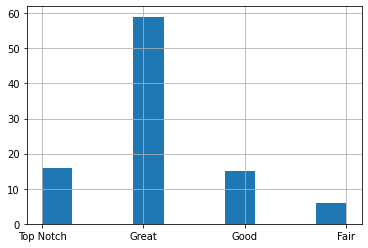

In [61]:
schoolDistrictsSATscores['Rating'].hist()